<a href="https://colab.research.google.com/github/jjablonski-it/pjatk-mhe/blob/main/MHE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import random
import math
import matplotlib.pyplot as plt

In [197]:
# constants
length = 100
value_range = 1000

In [198]:
data = sorted([random.randint(-value_range,value_range) for _ in range(length)])

In [199]:
# functions
def random_index():
  return ''.join(['%d' % random.randint(0,1) for _ in range(length)])

def index_to_set(index):
  result = []
  for i, x in enumerate(list(index)):
    if(x=='1'):
      result.append(i)
  return list(map(lambda x: data[x] ,result))

def subset_sum(index):
  return abs(sum(index_to_set(index)))

def negate_bit(index, n):
  index_list = list(index)
  bit = index_list[n]
  index_list[n] = '1' if bit=='0' else '0'
  return ''.join(index_list)

def generate_neighbours(index):
  return filter(lambda x: x != '0'*length, [negate_bit(index, x) for x in range(length)])

def plot_indices_to_sum(indices):
    plt.plot(list(map(lambda x: subset_sum(x), indices)))

In [200]:
class SA:
    def __init__(self, max_iteration):
        self.index = random_index()
        self.iteration = 1
        self.max_iteration = max_iteration
        self.index_per_iteration = []
        self.temp_per_iteration = []

    def calculate_cost(self, index):
        return subset_sum(index)

    def get_temp(self):
        return math.exp(-self.iteration/self.max_iteration)

    def update(self):
        self.index_per_iteration.append(self.index)
        self.temp_per_iteration.append(self.get_temp())

    def run(self):
        while(self.iteration < self.max_iteration):
            next_index = random.choice(list(generate_neighbours(self.index)))
            if self.calculate_cost(next_index) < self.calculate_cost(self.index):
                self.index = next_index
            else:
                if random.random() < self.get_temp() + .1:
                    self.index = next_index
            self.update()
            if(subset_sum(self.index) == 0):
                return self.index
            self.iteration += 1
        return self.index


0
7515


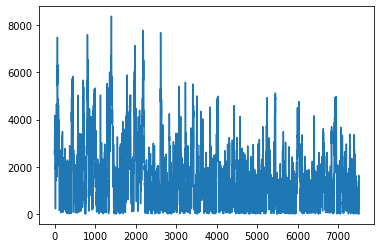

In [201]:
sa = SA(10000)
print(subset_sum(sa.run()))
print(sa.iteration)
plot_indices_to_sum(sa.index_per_iteration)

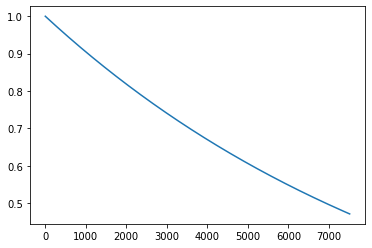

In [202]:
plt.plot(sa.temp_per_iteration)